In [1]:
pip install wbgapi 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import wbgapi as wb
import matplotlib
import matplotlib.pyplot as plt

In [80]:
# Conocer codigos 
wb.economy.coder(['Argentina', 'Brazil', 'Chile',
                  'Paraguay', 'Uruguay', 'Bolivia', 'Mexico', 'Colombia'])

ORIGINAL NAME,WBG NAME,ISO_CODE
Argentina,Argentina,ARG
Brazil,Brazil,BRA
Chile,Chile,CHL
Paraguay,Paraguay,PRY
Uruguay,Uruguay,URY
Bolivia,Bolivia,BOL
Mexico,Mexico,MEX
Colombia,Colombia,COL


In [76]:
wb.data.DataFrame('SP.POP.TOTL', ['ARG', 'BRA', 'CHL'], mrv=10, labels=True)

,Country,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
economy,,,,,,,,,,,
CHL,Chile,18047625.0,18267221.0,18558868.0,18893191.0,19197744.0,19370624.0,19456334.0,19553036.0,19658835.0,19764771.0
BRA,Brazil,201675532.0,203218114.0,204703445.0,206107261.0,207455459.0,208660842.0,209550294.0,210306415.0,211140729.0,211998573.0
ARG,Argentina,43477012.0,43900313.0,44288894.0,44654882.0,44973465.0,45191965.0,45312281.0,45407904.0,45538401.0,45696159.0


In [87]:
wb.data.DataFrame('SP.POP.TOTL', ['ARG', 'BRA', 'CHL'], range(2010,2016), labels=True)

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015
economy,,,,,,,
CHL,Chile,17181464.0,17351816.0,17519119.0,17687006.0,17864195.0,18047625.0
BRA,Brazil,193701929.0,195284734.0,196876111.0,198478299.0,200085127.0,201675532.0
ARG,Argentina,41288694.0,41730660.0,42161721.0,42582455.0,43024071.0,43477012.0


In [98]:
wb.region.info()

code,name
AFE,Africa Eastern and Southern
AFR,Africa
AFW,Africa Western and Central
ARB,Arab World
CAA,Sub-Saharan Africa (IFC classification)
CEA,East Asia and the Pacific (IFC classification)
CEB,Central Europe and the Baltics
CEU,Europe and Central Asia (IFC classification)
CLA,Latin America and the Caribbean (IFC classification)
CME,Middle East and North Africa (IFC classification)


<Axes: title={'center': 'Latin America & Caribbean (excluding high income)'}>

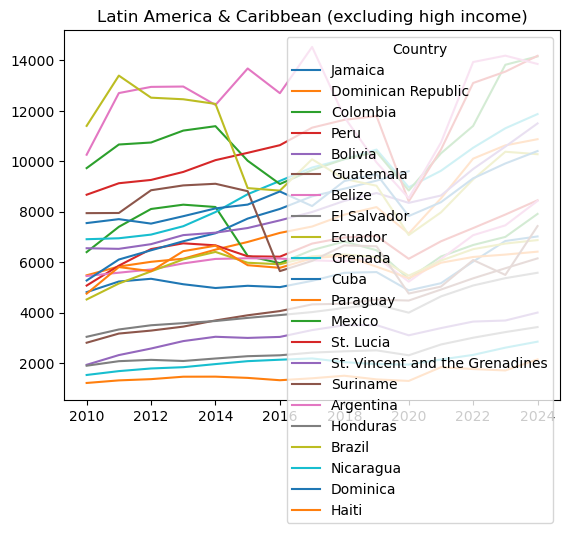

In [110]:
wb.data.DataFrame('NY.GDP.PCAP.CD',
    economy=wb.region.members('LAC'),
    time=range(2010, 2025), numericTimeKeys=True,
    labels=True).set_index('Country').transpose().plot(title='Latin America & Caribbean (excluding high income)')

In [144]:
# 1. Parámetros del análisis
indicators = ['NY.GDP.MKTP.CD', 'SP.POP.TOTL']
countries = [ 'ARG', 'BRA', 'CHL', 'URY', 'BOL', 'PRY']

# 2. Obtener los datos y crear el DF
print("Obteniendo datos de la API...")
df_data = wb.data.DataFrame(indicators, countries, mrv=20).reset_index() 

# 3. Transformación: Convertimos el df a formato largo (optimo para visualizaciones)
df_analysis = pd.melt(df_data,
                      id_vars=['economy', 'series'],
                      var_name='time',
                      value_name='value')

# 4. Transformación: Limpieza de datos
df_analysis = df_analysis.rename(columns={'series':'Indicator', 'economy':'Country'})
df_analysis['time'] = df_analysis['time'].str.replace('YR','').astype(int)


# 5. Mapeamos los nombres de indicadores y países
# Diccionarios predefinidos para evitar errores. (error TypeError: 'Featureset' object is not iterable
print("Mapeando nombres de indicadores y países...")

indicator_names = {
    'NY.GDP.MKTP.CD': 'PIB',
    'SP.POP.TOTL': 'Poblation',
    'NY.GDP.PCAP.CD': 'PIB per capita'
}

country_names = {
    'ARG': 'Argentina',
    'BRA': 'Brasil',
    'CHL': 'Chile',
    'URY': 'Uruguay',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay'
}

# Mapeamos los nombres a las columnas del DataFrame
df_analysis['Indicator'] = df_analysis['Indicator'].map(indicator_names)
df_analysis['Country'] = df_analysis['Country'].map(country_names)

# Limpiamos el DataFrame
df_analysis = df_analysis.dropna(subset=['value'])

print("\nDataFrame preparado. ¡Listo para el análisis!")
print(df_analysis.head())

Obteniendo datos de la API...
Mapeando nombres de indicadores y países...

DataFrame preparado. ¡Listo para el análisis!
     Country  Indicator  time         value
0  Argentina        PIB  2005  1.987371e+11
1  Argentina  Poblation  2005  3.921679e+07
2    Bolivia        PIB  2005  9.549123e+09
3    Bolivia  Poblation  2005  9.360754e+06
4     Brasil        PIB  2005  8.916338e+11


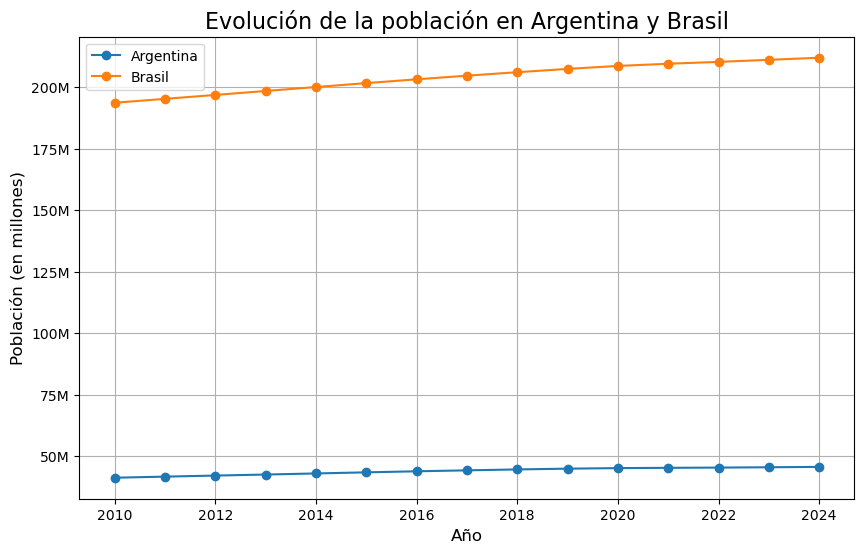

In [134]:
# Filtramos el DataFrame para obtener los datos 
df_filtrado = df_analysis[(df_analysis['Country'].isin(['Argentina', 'Brasil'])) & (df_analysis['Indicator'] == 'Poblation')]

# Filtro para el rango de años, por ejemplo, de 2010 a 2025.
df_filtrado = df_filtrado[(df_filtrado['time'] >= 2010) & (df_filtrado['time'] <= 2025)]

# Creamos la figura y los plots.
plt.figure(figsize=(10, 6))
for country in df_filtrado['Country'].unique():
    df_country = df_filtrado[df_filtrado['Country'] == country]
    plt.plot(df_country['time'], df_country['value'], label=country, marker='o')

# Formateamos el eje Y para mostrar los valores en millones.
from matplotlib.ticker import FuncFormatter

def millones(x, pos):
    return f'{x*1e-6:,.0f}M'

formatter = FuncFormatter(millones)
ax = plt.gca() # Obtenemos los ejes del gráfico actual.
ax.yaxis.set_major_formatter(formatter)

# Personalizamos el gráfico.
plt.title('Evolución de la población en Argentina y Brasil', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Población (en millones)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

### Formateo de PIB
El estándar es formatear el PIB en miles de millones (B) o billones (T). Utilizamos este código para:

    Convertir los números: La línea f'{x*1e-9:,.0f}B' toma los valores del PIB, que son números muy grandes, y los multiplica por 1e-9, lo que es lo mismo que dividirlos por mil millones. Esto convierte un valor como $450,000,000,000 en 450, haciéndolo legible. El sufijo B (de billion) indica que el número está en miles de millones.

    Eje Y: ax.yaxis.set_major_formatter(formatter) le dice a Matplotlib que aplique esta nueva regla de formato a los números del eje vertical.

    Eje X: La línea plt.xticks(...) se asegura de que los años en el eje horizontal se muestren como números enteros, en lugar de mostrarlos como números flotantes

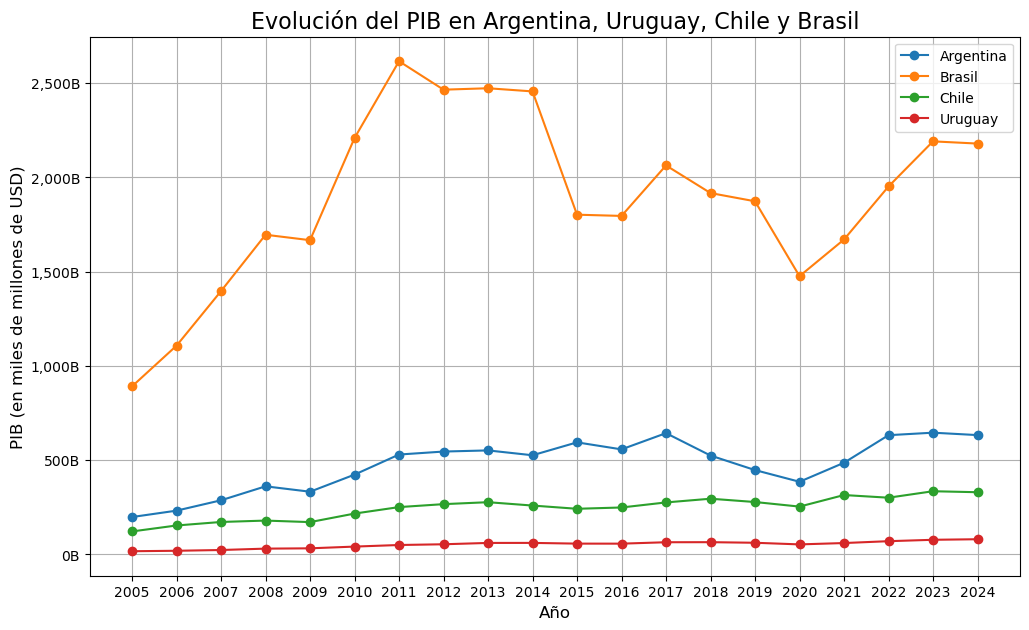

In [148]:
# Filtramos datos del df
df_filtrado = df_analysis[(df_analysis['Country'].isin(['Argentina', 'Uruguay', 'Chile', 'Brasil'])) & (df_analysis['Indicator'] == 'PIB')]

# Creamos el gráfico de líneas
plt.figure(figsize=(12, 7))
for country in df_filtrado['Country'].unique():
    df_country = df_filtrado[df_filtrado['Country'] == country]
    plt.plot(df_country['time'], df_country['value'], label=country, marker='o')

# Formato para el Eje Y del PIB en miles de millones ---
def billones(x, pos):
    return f'{x*1e-9:,.0f}B'

formatter = FuncFormatter(billones)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Formato para el Eje X para mostrar los años como enteros ---
plt.xticks(df_filtrado['time'].unique().astype(int))

# Personalizamos el gráfico
plt.title('Evolución del PIB en Argentina, Uruguay, Chile y Brasil', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB (en miles de millones de USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

### PIB PER CAPITA

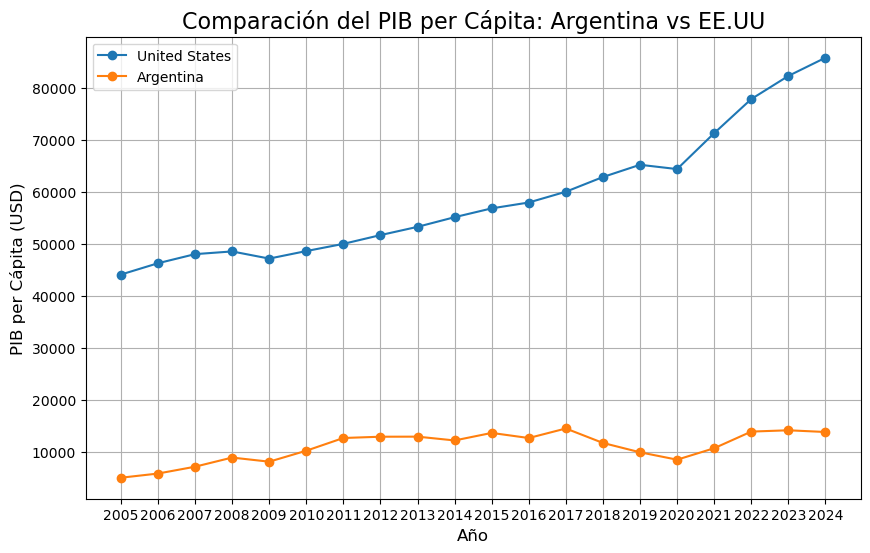

In [11]:

# 1. Parámetros para el análisis de PIB per Cápita
indicators_pib_pc = ['NY.GDP.PCAP.CD']
countries_pib_pc = ['ARG', 'USA']

# 2. Obtener los datos y crear el DF para PIB per Cápita
df_data_pib_pc = wb.data.DataFrame(indicators_pib_pc, countries_pib_pc, mrv=20, labels=True)

# 3. Transformación: Convertimos el df a formato largo (optimo para visualizaciones)
df_pib_per_capita_analysis = pd.melt(df_data_pib_pc,
                                     id_vars=['Country'],
                                     var_name='time',
                                     value_name='value')

# 4. Limpieza de datos
df_pib_per_capita_analysis['time'] = df_pib_per_capita_analysis['time'].str.replace('YR', '').astype(int)
df_pib_per_capita_analysis = df_pib_per_capita_analysis.dropna(subset=['value'])


# 5. Grafico de lineas 
plt.figure(figsize=(10,6))
for country in df_pib_per_capita_analysis['Country'].unique():
    df_country = df_pib_per_capita_analysis[df_pib_per_capita_analysis['Country'] == country]
    plt.plot(df_country['time'], df_country['value'], label=country, marker='o')



# 6. personalización del gráfico
plt.title('Comparación del PIB per Cápita: Argentina vs EE.UU', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB per Cápita (USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(df_pib_per_capita_analysis['time'].unique().astype(int))
plt.show()

### Exportaciones 

# Chequear columnas 
# 1. Parámetros para el análisis de Exportaciones

indicators_exports = ['BX.KLT.DINV.CD.WD']

countries_exports = ['ARG', 'USA']


# 2. Obtener los datos y crear el DF para PIB per Cápita

df_data_exports = wb.data.DataFrame(indicators_exports, countries_exports, mrv=20, labels=True)


# ¡Imprimimos los nombres de las columnas para ver qué nos devuelve la API!

print("Nombres de las columnas devueltas por la API:")

print(df_data_exports.columns) 

In [6]:
wb.data.DataFrame('BX.KLT.DINV.CD.WD', ['ARG', 'BRA', 'CHL'], mrv=10, labels=True)

,Country,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
economy,,,,,,,,,,,
CHL,Chile,1.776629e+10,1.136283e+10,5.237184e+09,7.942632e+09,1.357909e+10,1.144740e+10,1.517690e+10,1.877199e+10,1.837736e+10,1.252139e+10
BRA,Brazil,6.473815e+10,7.429463e+10,6.888549e+10,7.818384e+10,6.917441e+10,3.827012e+10,4.644050e+10,7.460636e+10,6.244188e+10,7.106985e+10
ARG,Argentina,1.175899e+10,3.260164e+09,1.151686e+10,1.171677e+10,6.649188e+09,4.884128e+09,6.658050e+09,1.520060e+10,2.386614e+10,1.143097e+10


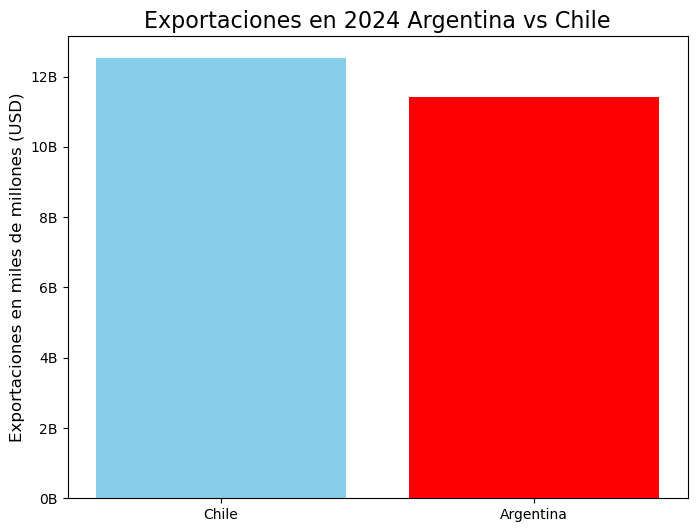

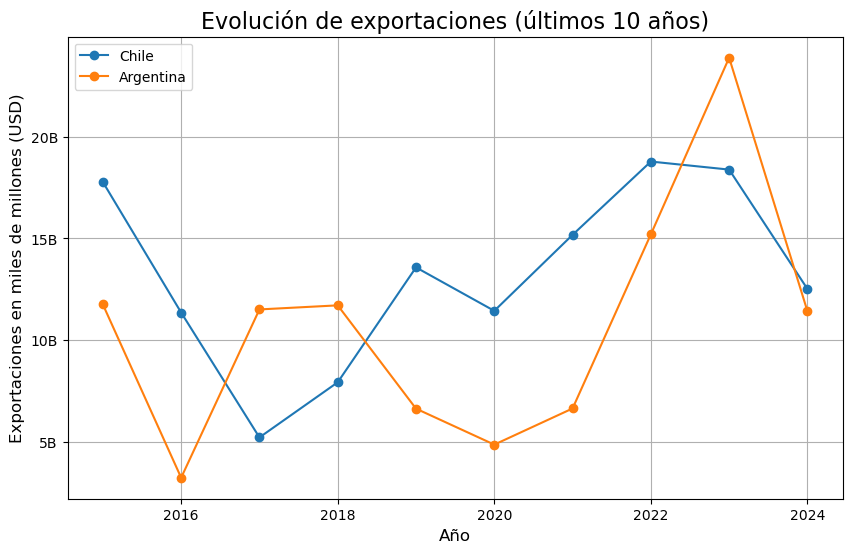

In [34]:
# 1. Parámetros para el análisis de Exportaciones

indicators_exports = ['BX.KLT.DINV.CD.WD']

countries_exports = ['ARG', 'CHL']


# 2. Obtener los datos y crear el DF para PIB per Cápita

df_data_exports = wb.data.DataFrame(indicators_exports, countries_exports, mrv=20, labels=True)

# 3. Transformación: Convertimos el df a formato largo (optimo para visualizaciones)
df_data_exports_analysis = pd.melt(df_data_exports,
                                     id_vars=['Country'],
                                     var_name='time',
                                     value_name='value')

# 4. Limpieza de datos
df_data_exports_analysis['time'] = df_data_exports_analysis['time'].str.replace('YR', '').astype(int)
df_data_exports_analysis = df_data_exports_analysis.dropna(subset=['value'])


# 5. Formatear número (millones)
from matplotlib.ticker import FuncFormatter

def miles_de_millones(x, pos):
    return f'{x*1e-9:,.0f}B'  # valores en miles de millones (USD)

formatter = FuncFormatter(miles_de_millones)


# 6. Comparació de exportaciones en 2024
df_exports_2024 = df_data_exports_analysis[df_data_exports_analysis['time'] == 2024]

plt.figure(figsize=(8,6))
plt.bar(df_exports_2024['Country'], df_exports_2024['value'], color=['skyblue','red'])

plt.title('Exportaciones en 2024 Argentina vs Chile', fontsize=16)
plt.ylabel('Exportaciones en miles de millones (USD)', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()


# Grafico de Lineas (últimos 10 años)
max_year = df_data_exports_analysis['time'].max()
df_last10 = df_data_exports_analysis[df_data_exports_analysis['time'] >= max_year - 9]

plt.figure(figsize=(10,6))
for country in df_last10['Country'].unique():
    df_country = df_last10[df_last10['Country'] == country]
    plt.plot(df_country['time'], df_country['value'], label=country, marker='o')

plt.title('Evolución de exportaciones (últimos 10 años)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Exportaciones en miles de millones (USD)', fontsize=12)
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()
        

### Importaciones

In [9]:
wb.data.DataFrame('BM.GSR.TOTL.CD', ['ARG', 'BRA', 'CHL'], mrv=10, labels=True)

,Country,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
economy,,,,,,,,,,,
CHL,Chile,8.502850e+10,8.398358e+10,9.541010e+10,1.091538e+11,1.038614e+11,8.889406e+10,1.310172e+11,1.474885e+11,1.271042e+11,1.283535e+11
BRA,Brazil,2.920199e+11,2.637895e+11,3.018874e+11,3.405892e+11,3.501401e+11,2.855598e+11,3.901644e+11,4.664036e+11,4.512567e+11,4.877067e+11
ARG,Argentina,9.108675e+10,9.043682e+10,1.097075e+11,1.117488e+11,9.063422e+10,6.665368e+10,8.489745e+10,1.128073e+11,1.121131e+11,9.892380e+10


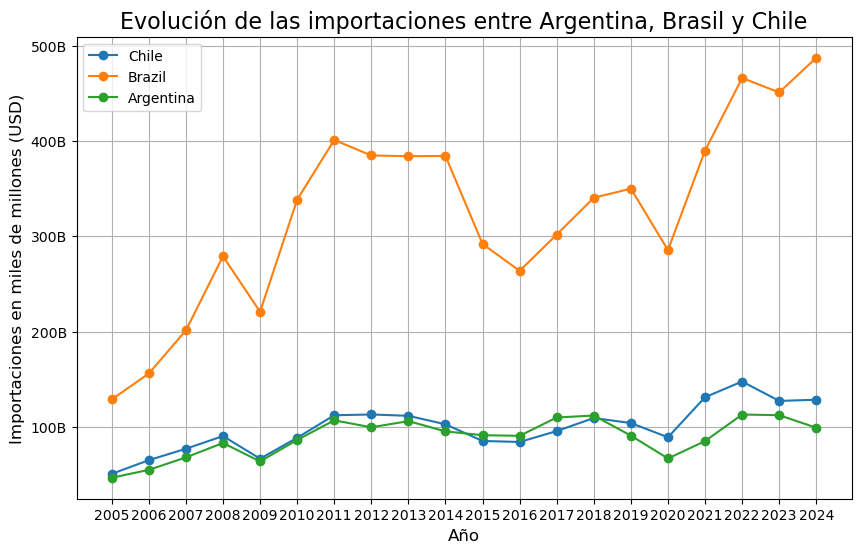

In [50]:
indicators_imports = ['BM.GSR.TOTL.CD']
countries_imports = ['ARG', 'BRA', 'CHL']

df_data_imports = wb.data.DataFrame(indicators_imports, countries_imports, mrv=20, labels=True)

df_data_imports_analysis = pd.melt(df_data_imports,
                                     id_vars=['Country'],
                                     var_name='time',
                                     value_name='value')

df_data_imports_analysis['time'] = df_data_imports_analysis['time'].str.replace('YR', '').astype(int)
df_data_imports_analysis = df_data_imports_analysis.dropna(subset=['value'])

from matplotlib.ticker import FuncFormatter

def miles_de_millones(x, pos):
    return f'{x*1e-9:,.0f}B'  # valores en miles de millones (USD)

formatter = FuncFormatter(miles_de_millones)

plt.figure(figsize=(10,6))
for country in df_data_imports_analysis['Country'].unique():
    df_country = df_data_imports_analysis[df_data_imports_analysis['Country'] == country]
    plt.plot(df_country['time'], df_country['value'], label=country, marker='o')



# 6. personalización del gráfico
plt.title('Evolución de las importaciones entre Argentina, Brasil y Chile', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Importaciones en miles de millones (USD)', fontsize=12)
plt.grid(True)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.xticks(df_data_imports_analysis['time'].unique().astype(int))

plt.show()